In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [4]:
def plot_decision_boundary(model, X, y, pixel_step=0.02):
    """
    Визуализирует границу решения для модели классификации на основе дерева решений.

    Параметры:
        model : обученная модель классификации (дерево решений)
        X : признаки (данные)
        y : метки классов
        pixel_step : шаг для генерации точек на плоскости (по умолчанию 0.02)
    """
    # Создание нового графика
    fig = plt.figure(figsize=(16, 10))
    
    # Вычисление границ признакового пространства
    x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
    x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

    # Генерация точек на плоскости
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, pixel_step),
        np.arange(x2_min, x2_max, pixel_step)
    )

    # Прогнозирование классов для каждой точки на плоскости
    Z = model.predict(pd.DataFrame(np.c_[xx1.ravel(), xx2.ravel()],
                              columns=["x1", "x2"]))

    Z = Z.reshape(xx1.shape)

    # Заполнение пространства контурами, отображающими прогнозы модели
    cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

    plt.axis("tight")

    # Отображение точек данных для каждого класса и обученных областей
    for i, n, c in zip(range(2), model.classes_, ["#FF5533", "#00B050"]):
        idx = np.where(y == i)
        plt.scatter(
            X.values[idx, 0],
            X.values[idx, 1],
            c=c,
            s=20,
            edgecolor="k",
            label="Class %s" % n,
        )
    
    # Установка пределов осей и добавление подписей
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.legend(loc="upper right")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Decision Boundary")
    plt.show()


from sklearn.tree import plot_tree

def plot_decision_tree(decision_tree, feature_names, class_names):
    """
    Визуализирует дерево решений в виде графа.

    Параметры:
        decision_tree : обученная модель дерева решений
        feature_names : list
            Список названий признаков.
        class_names : list
            Список названий классов.
    """
    fig = plt.figure(figsize=(16, 10))

    plot_tree(
        decision_tree,
        feature_names=feature_names,
        class_names=class_names,
        filled=True
    )

    plt.show()

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [8]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Accuracy на трейне: 1.000


None

Accuracy на тесте: 0.800


None

E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


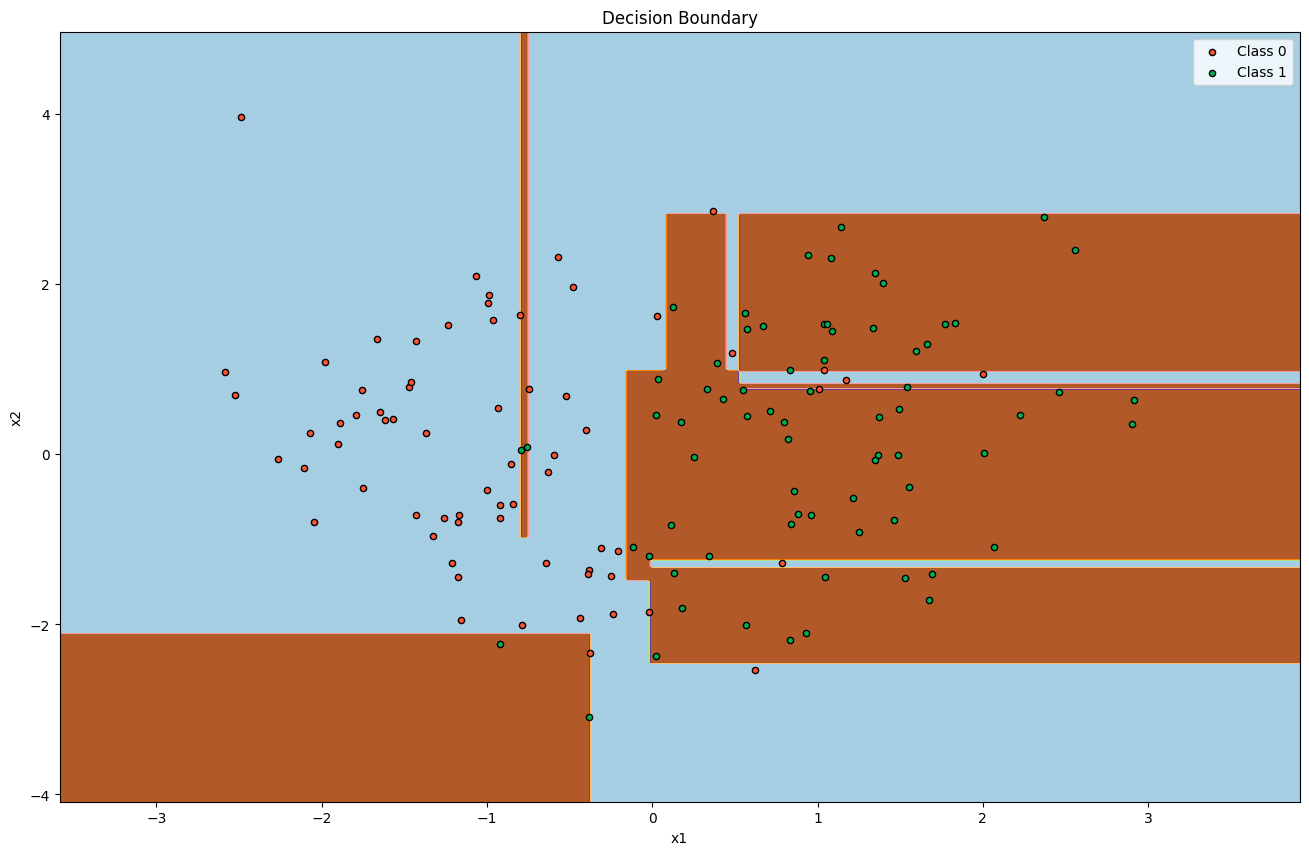

None

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

display(print(f"Accuracy на трейне: {accuracy_score(y_train, decision_tree.predict(X_train)):.3f}"))

display(print(f"Accuracy на тесте: {accuracy_score(y_test, decision_tree.predict(X_test)):.3f}"))

display(plot_decision_boundary(decision_tree, pd.DataFrame(X_train), y_train))

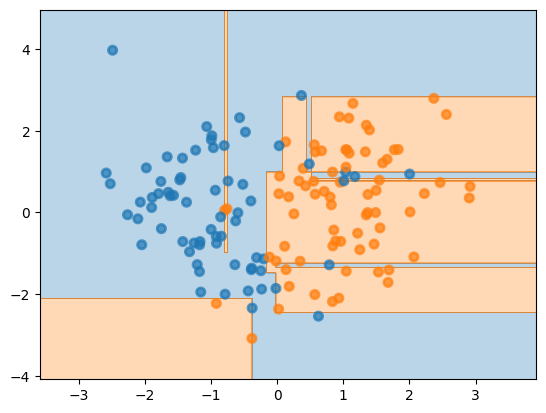

In [23]:
plot_surface(decision_tree, X_train, y_train)

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [59]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
               edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.text(0.05, 0.95, f'Train Acc: {train_acc:.5f}', transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.9, f'Test Acc: {test_acc:.5f}', transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.85, f'Max Depth: {clf.max_depth}', transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.8, f'Min Samples Leaf: {clf.min_samples_leaf}', transform=ax.transAxes, ha='left', va='top')

In [60]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

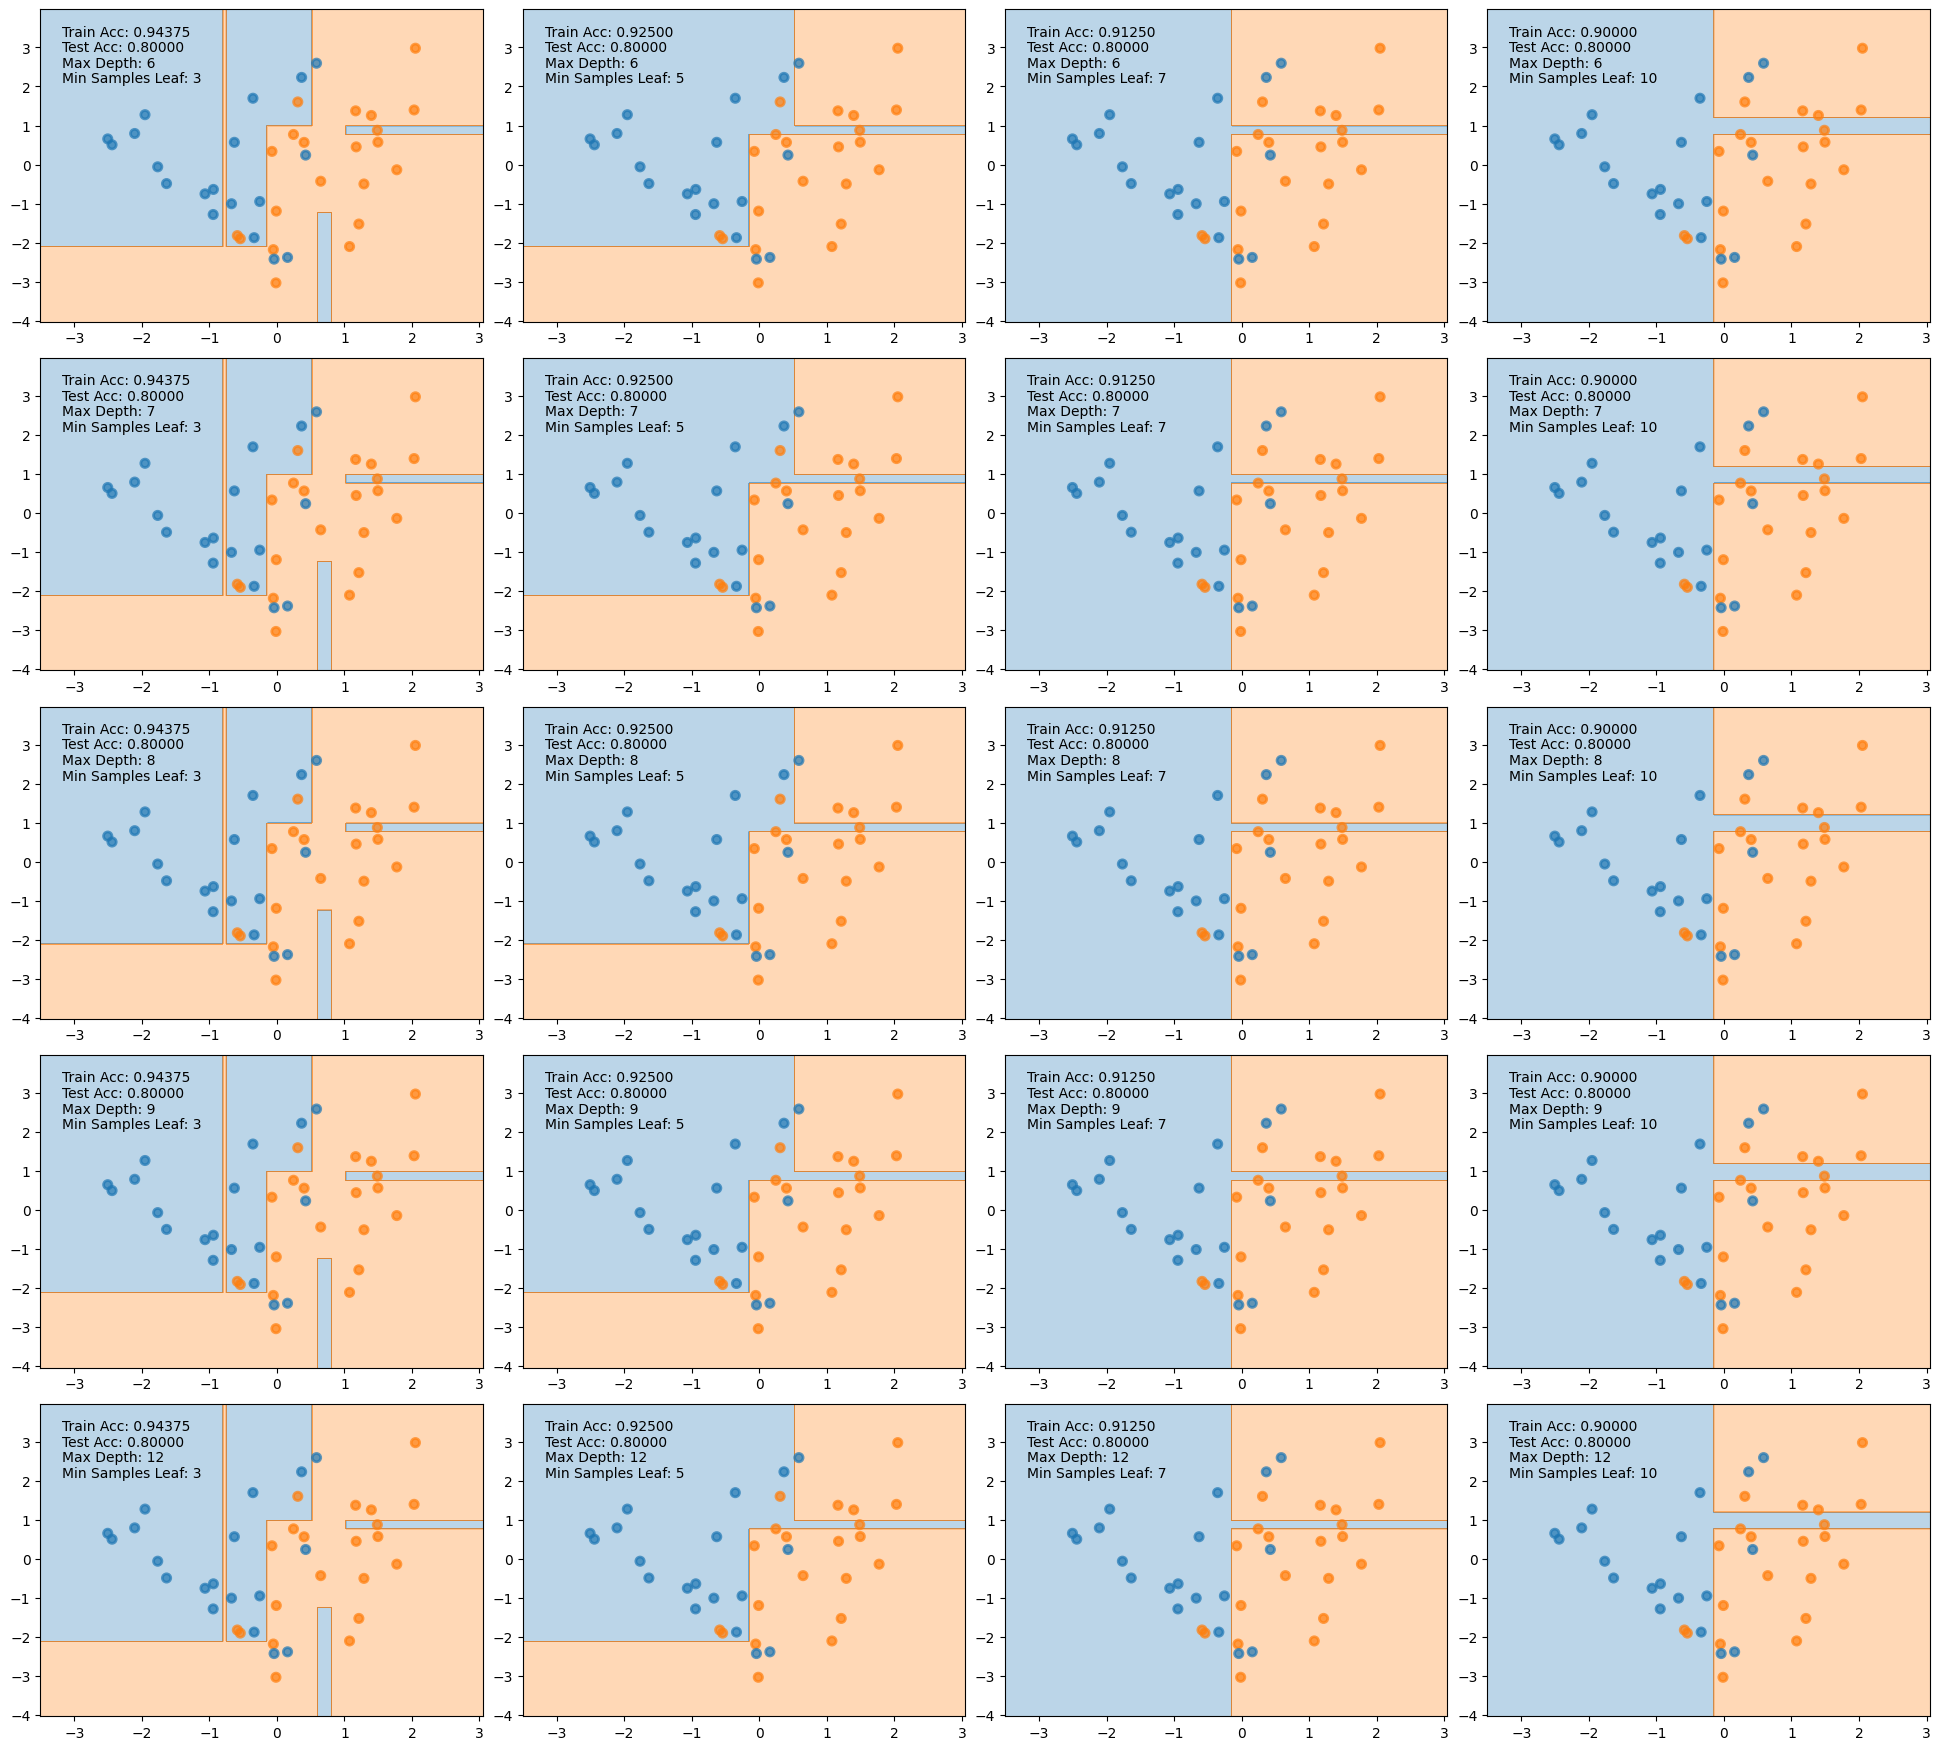

In [63]:
### Your code is here

best_test_acc = 0

fig, axes = plt.subplots(len(max_depth_set), len(min_samples_leaf_set), figsize=(20, 18))

for i, max_depth in enumerate(max_depth_set):
    for j, min_samples_leaf in enumerate(min_samples_leaf_set):

        decision_tree = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf
        )

        decision_tree.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, decision_tree.predict(X_train))

        test_acc = accuracy_score(y_test, decision_tree.predict(X_test))

        plot_surface_axes(decision_tree, X_test, y_test, axes[i, j], train_acc, test_acc)

        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_model = decision_tree

plt.show()

In [65]:
print("Лучшая модель:")
print(f"Accuracy на тесте: {best_test_acc}")
print(f"max_depth: {best_model.max_depth}")
print(f"min_samples_leaf: {best_model.min_samples_leaf}")

Лучшая модель:
Accuracy на тесте: 0.8
max_depth: 6
min_samples_leaf: 3


__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [67]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!
Трансформировали датасет!


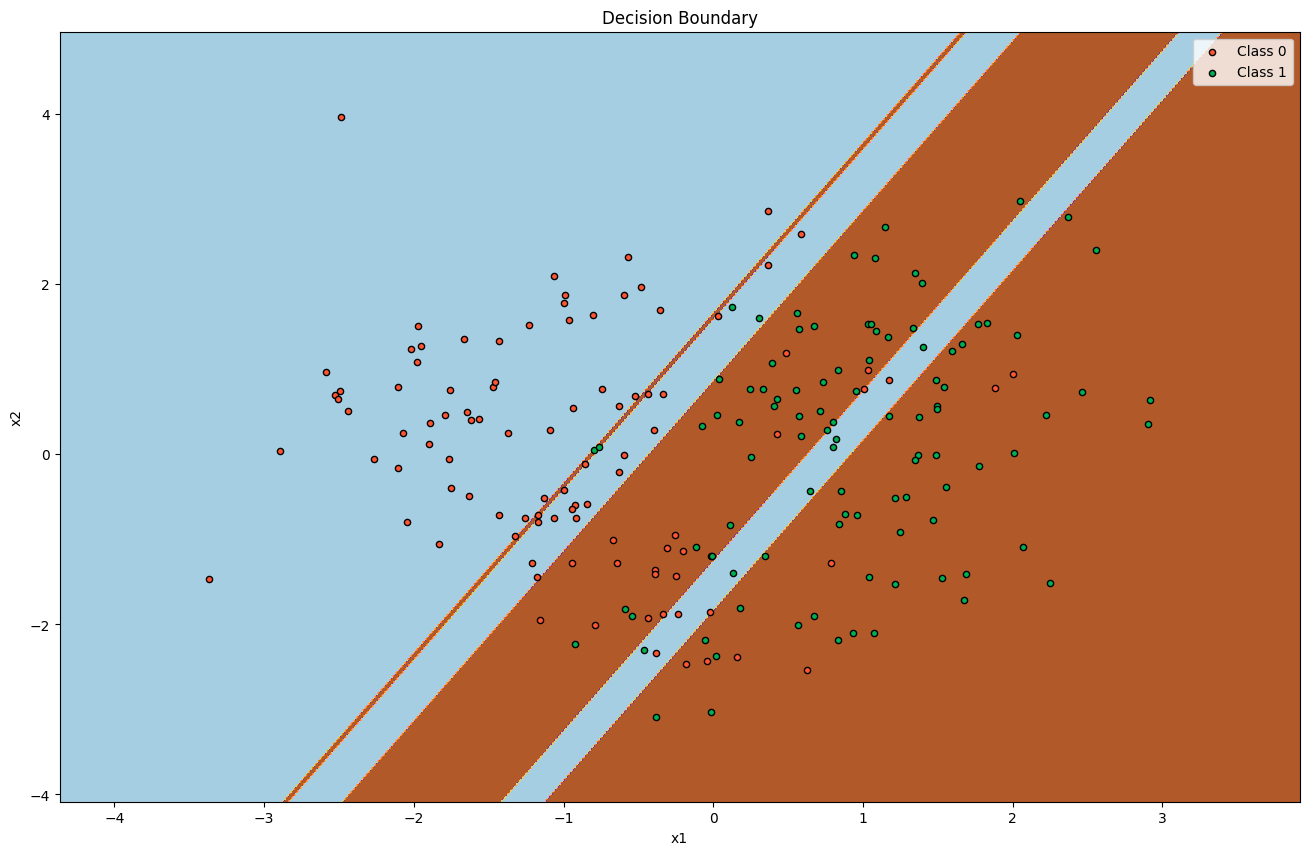

None

Трансформировали датасет!
Accuracy на трейне: 0.8625


None

Трансформировали датасет!
Accuracy на тесте: 0.75


None

In [74]:
from sklearn.pipeline import Pipeline

### Your code is here

pipe = Pipeline([
    ("transformer", CustomFunctionTransformer(
        "x1",
        "x2",
        lambda x1, x2: 2*x1-x2
    )),
    ("decision_tree", DecisionTreeClassifier(max_depth=3))
])

pipe.fit(X_train, y_train)

display(plot_decision_boundary(pipe, pd.DataFrame(X), y))

display(print(f"Accuracy на трейне: {accuracy_score(y_train, pipe.predict(X_train))}"))
display(print(f"Accuracy на тесте: {accuracy_score(y_test, pipe.predict(X_test))}"))